## Mobile Price Prediction using Linear Regression
The objective is to analyze factors like RAM, camera quality, and battery power to build a Linear Regression model that predicts mobile phone prices. The model aims to provide accurate price predictions based on hardware specifications.

-------------------------------------------------------------------------------------------------------------------


### 1. Explore the Dataset:

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('mobile_price.csv')

#### 1.1 Understand the Data:

In [7]:
df.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [8]:
df.shape

(161, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [10]:
categorical_columns = df[['cpu core', 'internal mem', 'ram']].columns

for i in categorical_columns:
    print(f'{i} \n{df[i].unique().round(2)}')

cpu core 
[8 2 4 6 1 0]
internal mem 
[ 16.     4.     8.    32.    64.     0.   128.     0.     0.13   0.26]
ram 
[3.   1.   1.5  0.51 2.   4.   6.   0.   0.01 0.03 0.   0.13]


From the above, we have a small dataset consisting of **161 rows** and **14 columns**. 

Even though all columns appear to be numerical, certain attributes should be considered **categorical** in nature. These include:

- `Product_id`
- `cpu core`
- `internal mem`
- `ram`

These features represent distinct categories or hardware configurations rather than continuous variables. Treating them as categorical will help improve the interpretability of the model.

##### 1.1.1 Data Cleaning:

In [13]:
df.columns = ['PPI' if col == 'ppi' else col.replace(' ', '_').title() for col in df.columns]
df.rename(columns={'Rearcam' : 'Rear_Cam'}, inplace=True)
df.head()

,Product_Id,Price,Sale,Weight,Resoloution,PPI,Cpu_Core,Cpu_Freq,Internal_Mem,Ram,Rear_Cam,Front_Cam,Battery,Thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


##### 1.1.2 Data Exploration:

In [15]:
df['Price'].skew()

0.05234678230116894

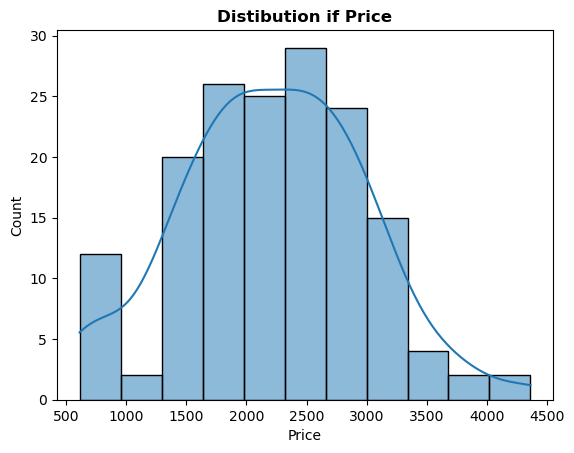

In [16]:
sns.histplot(data=df, x='Price', kde=True)
plt.title('Distibution if Price', fontweight='bold')
plt.show()

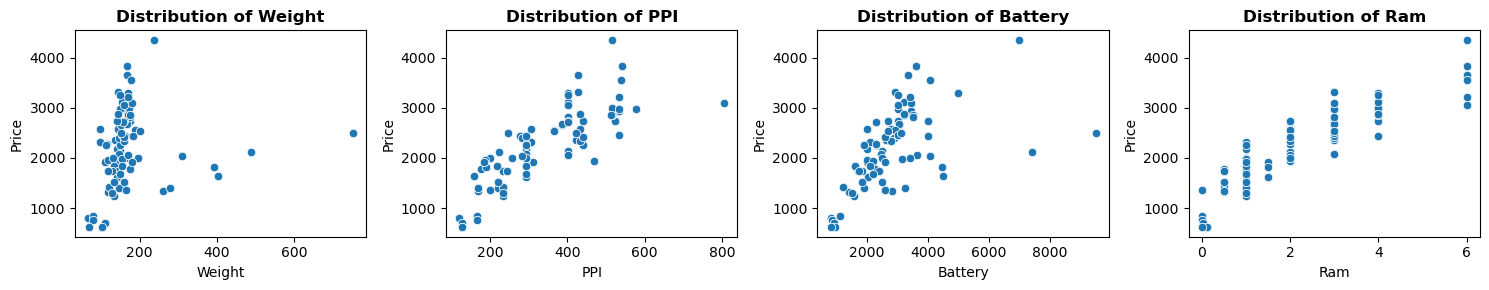

In [17]:
columns = df[['Weight', 'PPI', 'Battery', 'Ram']]

fig, axes = plt.subplots(ncols=4, figsize=(15, 3))
for col, axis in zip(columns.columns.to_list(), axes):
    sns.scatterplot(data=df, x=col, y='Price', ax=axis)
    axis.set_title(f'Distribution of {col}', fontweight='bold')

plt.tight_layout()
plt.show()

- The `Price` attribute is well distributed, forming a bell-shaped (normal) distribution with skewness close to zero.
- The price increases with the improvement in mobile specifications, as demonstrated by the scatter plots.

### 1.2 Examine Statistical Summary:

In [20]:
df.drop(columns='Product_Id').describe().round(2)

,Price,Sale,Weight,Resoloution,PPI,Cpu_Core,Cpu_Freq,Internal_Mem,Ram,Rear_Cam,Front_Cam,Battery,Thickness
count,161.00,161.00,161.00,161.00,161.00,161.00,161.00,161.0,161.00,161.00,161.00,161.00,161.00
mean,2215.60,621.47,170.43,5.21,335.06,4.86,1.50,24.5,2.20,10.38,4.50,2842.11,8.92
std,768.19,1546.62,92.89,1.51,134.83,2.44,0.60,28.8,1.61,6.18,4.34,1366.99,2.19
min,614.00,10.00,66.00,1.40,121.00,0.00,0.00,0.0,0.00,0.00,0.00,800.00,5.10
25%,1734.00,37.00,134.10,4.80,233.00,4.00,1.20,8.0,1.00,5.00,0.00,2040.00,7.60
50%,2258.00,106.00,153.00,5.15,294.00,4.00,1.40,16.0,2.00,12.00,5.00,2800.00,8.40
75%,2744.00,382.00,170.00,5.50,428.00,8.00,1.88,32.0,3.00,16.00,8.00,3240.00,9.80
max,4361.00,9807.00,753.00,12.20,806.00,8.00,2.70,128.0,6.00,23.00,20.00,9500.00,18.50


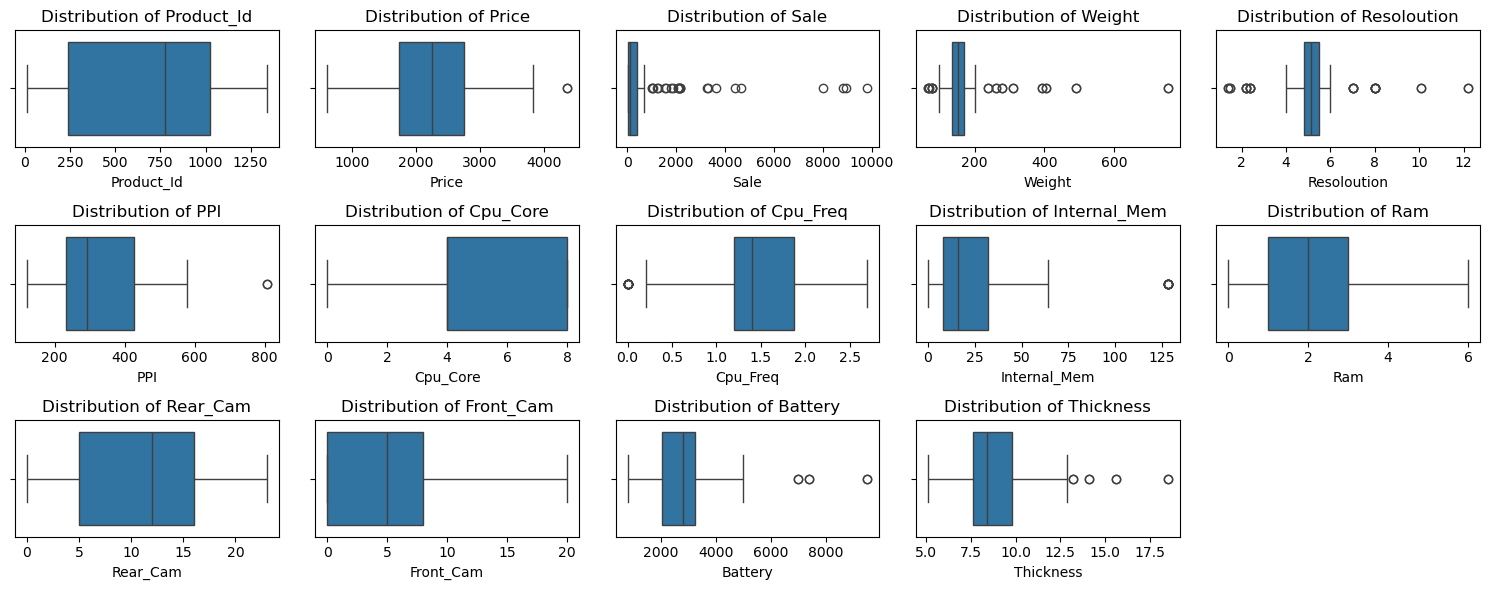

In [21]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 6))
axes = axes.flatten()

for col, axis in zip(df.columns.to_list(), axes):
    sns.boxplot(data=df, x=col, ax=axis)
    axis.set_title(f'Distribution of {col}')
    
axes[-1].set_visible(False)
plt.tight_layout()
plt.show()

Outliers in features like price, Sale, weight, and resolution may carry important information, especially in the context of mobile phones, where:

- **Market diversity**: Removing outliers in `price` could eliminate insights into budget or premium devices.
- **Extreme but valid products**: Devices with unique specs may target niche markets, so their outliers are relevant.
- **Impact on model accuracy**: Outliers help the model learn relationships for extreme values, enhancing prediction accuracy.

Thus, outliers may contain valuable information, at the same we have minimal data, removing them may oversimplify the data and affect the predictions. So, they shouldn't be removed hastily.

#### 1.3 Correlation Analysis:

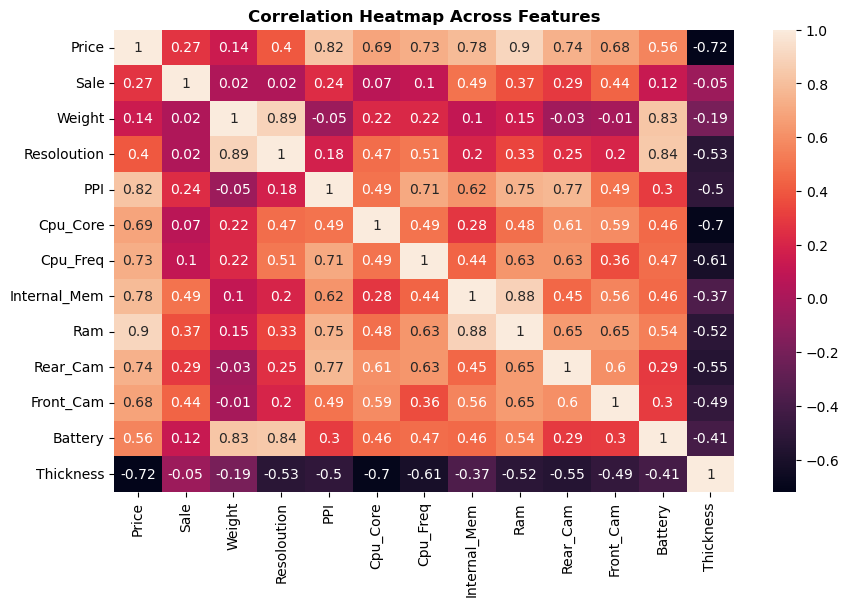

In [24]:
corr = df.drop(columns='Product_Id').corr().round(2)

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True)

plt.title('Correlation Heatmap Across Features', fontweight='bold')
plt.show()

#### 1.4 Relationship Analysis:

As our Target is a continuous value, using Correlation Matrix to select the top features is preferable rather than using SelectKBest

In [27]:
top_4_features = corr['Price'].drop('Price').abs().sort_values(ascending=False).head(4)
top_4_features

Ram             0.90
PPI             0.82
Internal_Mem    0.78
Rear_Cam        0.74
Name: Price, dtype: float64

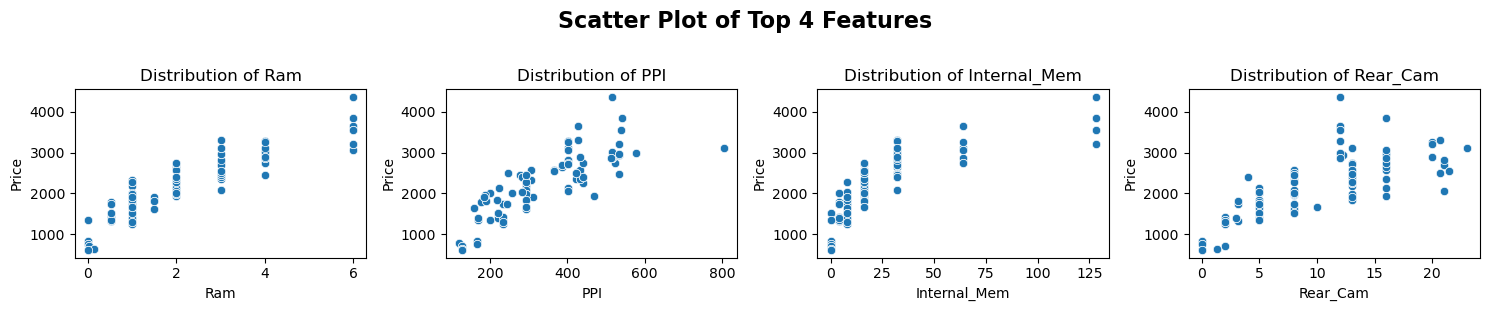

In [28]:
fig, axes = plt.subplots(ncols=4, figsize=(15, 3))

for col, axis in zip(df[top_4_features.index.to_list()].columns, axes):
    sns.scatterplot(data=df, x=col, y='Price', ax=axis)
    axis.set_title(f'Distribution of {col}')

plt.suptitle('Scatter Plot of Top 4 Features', fontsize=16, y=1.02, fontweight='bold')
plt.tight_layout()
plt.show()

### 2. Prepare the Data: (Top 4 Features)

#### 2.1 Feature Selection:

In [31]:
X = df[top_4_features.index] # Features - Independent variables
y = df['Price'] # Target - Dependent variable

#### 2.2 Split the Dataset:

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12)

print(f"Dataset shape: {df.shape}")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Dataset shape: (161, 14)
X_train shape: (128, 4)
X_test shape: (33, 4)
y_train shape: (128,)
y_test shape: (33,)


### 3. Build and Train the Model:

#### 3.1 Create a Linear Regression Model:

In [36]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

#### 3.2 Train the Model:

In [38]:
model.fit(X_train, y_train)

LinearRegression()

### 4. Evaluate the Model:

#### 4.1 Predict:

In [41]:
y_pred = model.predict(X_test).round(2)

#### 4.2 Metrics Calculation:

##### Slope (Coefficient) and Intercept

In [44]:
slope = model.coef_
intercept = model.intercept_

print('**Slope (Coefficient)**')
for col, slp in zip(X_train.columns, slope):
    print(f'{col:<15}: {slp:>8.3f}')

print('-------------------------------------------')
print(f"**Intercept** \n{intercept.round(3)}")

**Slope (Coefficient)**
Ram            :  272.420
PPI            :    1.301
Internal_Mem   :    2.104
Rear_Cam       :   19.035
-------------------------------------------
**Intercept** 
930.638


##### Model Performance Metrics:

In [46]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(f"R² Score: {r2_score(y_test, y_pred).round(3)}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred).round(3)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred).round(3)}")
print(f"Root Mean Squared Error (RMSE): {(mean_squared_error(y_test, y_pred)**0.5).round(3)}")

R² Score: 0.858
Mean Absolute Error (MAE): 189.892
Mean Squared Error (MSE): 58032.977
Root Mean Squared Error (RMSE): 240.9


### 5. Conclude the Analysis:

#### 5.1 Model Evaluation:
a. **R² Score**: The R² score of 0.858 indicates that the model explains 85.8% of the variance in mobile prices, showing a strong fit.

b. **Mean Absolute Error (MAE)**: The average error is 189 units, which is around 8.5% of the mean price (2215.60), and lesser than one standard deviation (768.19) indicating fairly accurate predictions.

c. **Mean Squared Error (MSE)**: MSE indicates the squared average difference between the predicted and actual prices. While the MSE value (58032.977) is large, the more interpretable metric is the RMSE, which helps understand the magnitude of errors.

d. **Root Mean Squared Error (RMSE)**: The error (240.9) is around 10.8% of the mean price, which is within one standard deviation of the data, suggesting good performance. Given that the RMSE is larger than the MAE, due to some outliers in the dataset.

The model performs well for predicting mobile prices. Minor improvements could be made by handling outliers,  exploring more complex models and increase the feature, but overall, it’s satisfactory.

### For All The Features

In [50]:
X = df.drop(columns=['Product_Id', 'Price']) # Features - Independent variables
y = df['Price'] # Target - Dependent variable

In [51]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12)

In [52]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [53]:
slope = model.coef_
intercept = model.intercept_

y_pred = model.predict(x_test).round(2)

print('**Slope**')
for col, slp in zip(x_train.columns.to_list(), slope):
    print(f'{col:<15}: {slp:>8.3f}')

print('-------------------------------------------')
print(f"**Intercept** \n{intercept.round(3)}")

**Slope**
Sale           :   -0.034
Weight         :    0.594
Resoloution    : -139.499
PPI            :    0.991
Cpu_Core       :   57.104
Cpu_Freq       :  158.048
Internal_Mem   :    6.620
Ram            :   87.050
Rear_Cam       :    4.178
Front_Cam      :   16.992
Battery        :    0.109
Thickness      :  -81.142
-------------------------------------------
**Intercept** 
1960.638


In [54]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(f"R² Score: {r2_score(y_test, y_pred).round(3)}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred).round(3)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred).round(3)}")
print(f"Root Mean Squared Error (RMSE): {(mean_squared_error(y_test, y_pred)**0.5).round(3)}")

R² Score: 0.931
Mean Absolute Error (MAE): 143.038
Mean Squared Error (MSE): 28355.778
Root Mean Squared Error (RMSE): 168.392


- As the number of features increased, the model's performance significantly improved, with the R² score rising from 85% to 93%. At the same time, errors such as MAE, MSE, and RMSE decreased.
- From this we can conclude that, increasing the number of features significantly improved the model's accuracy, as shown by a higher R² score and lower error metrics.

#### 5.2 Insights and Discussion:

##### What insights did you gain from the correlation analysis and scatter plots?

- **Correlation Analysis**: Shows feature relationships; values near -1 or 1 indicate strong negative or positive correlation, respectively.
- **Key Influential Features**: RAM, PPI, Internal Memory, and Rear Camera are the most impactful on mobile price.
- **Scatter Plot Insight**: Reveals a clear positive correlation between these features and price.

##### How do the selected features contribute to the prediction of mobile prices?
- All selected features have positive correlations with price, with Ram being the most impactful.
- In a linear regression model, these features would have higher coefficients, indicating their significant roles in price prediction.

##### What do the slope (coefficient) and intercept reveal about the relationship between the features and the target variable?
In this model, the coefficients (slopes) represent the contribution of each feature to the prediction of mobile prices.
- **Intercept (930.638)**: This is the base price when all feature values are set to zero. It's the starting point for predictions.
- Features have the slope of positive values generally increasing the price and negative values decreasing it.

##### How well does the model perform based on the evaluation metrics? Are there any discrepancies between the predicted and actual values?
- The model performs well, explaining most of the variance in mobile prices with error metrics showing fairly accurate predictions, staying within a reasonable range from the average price and less than one standard deviation.
- Some outliers are causing slightly larger errors, suggesting room for minor improvements by handling these outliers or trying more advanced models, but overall the performance is satisfactory.

##### What might be some potential improvements or additional steps you could take to enhance the model’s performance?
- As I experimented the model with all the features, we can clearly observe that there is a significant improvement in the R² score and the errors such as MAE, MSE, and RMSE decreased.
- Increasing the number of features can improve model performance if the features are relevant, but it's important to apply feature selection and validation to avoid overfitting and unnecessary complexity.